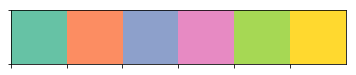

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score,train_test_split,GridSearchCV

%matplotlib inline
current_palette_1 = sns.color_palette("Set2", 6)
sns.set_palette(current_palette_1)
sns.palplot(current_palette_1)

# Data Exploration

In [431]:
#import data
df_train = pd.read_csv('train.csv',dtype={'Age':np.float64},) #for extra precision

In [432]:
df_test = pd.read_csv('test.csv',dtype={'Age':np.float64},)

In [433]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [434]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Saad, Mr. Khalil",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [435]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [436]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [437]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 **Observations**: train set and test set contain 891 samples and 418 samples respectively. For training set there are missing values in age,cabin and embarked columns. For test set there are missing values only in age and cabin columns.
 
 Next I should visualise and clean the columns. Since PassengerId is just a index and we can't use it for learning, we will just skip it

## Pclass

In [438]:
table = pd.pivot_table(df_train,values = "PassengerId",index = "Pclass",aggfunc='count',columns="Survived")
table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


So passengers belonging to the third class are less likely to survive. But why though?

According to Telegraph: "More of the first class passengers survived because their cabins were closer to the lifeboats ... and many of the emigrants in third class died because their poor English meant they did not understand what was happening."

That theory seems plausible enough. Now, I will do a quick plot of this and move on.

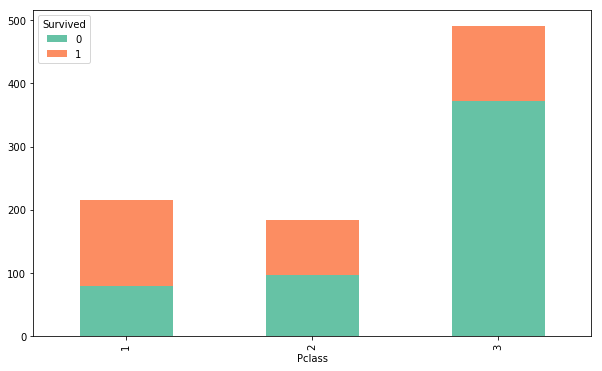

In [439]:
table.plot(kind='bar',stacked=True,figsize=(10,6))

## Name

Names are pretty useful but not in this dataset. There are too many of them to hot encode. I should probably try grouping them into classes using their titles

In [440]:
df_train['Title'] = df_train['Name'].apply(lambda x: (re.search('([a-zA-Z]+)\.', x)).group(1)) #group coz . is optional so group1 does not include . but group0 does 
df_test['Title'] = df_test['Name'].apply(lambda x: (re.search('([a-zA-Z]+)\.', x)).group(1))

df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Mme           1
Ms            1
Lady          1
Don           1
Capt          1
Countess      1
Sir           1
Name: Title, dtype: int64

Still too many. Should whittle it down some more. Let's try grouping them by social status

In [441]:
titles = {'Capt':       'Officer',
          'Col':        'Officer',
          'Major':      'Officer',
          'Jonkheer':   'Royalty',
          'Don':        'Royalty',
          'Sir' :       'Royalty',
          'Dr':         'Officer',
          'Rev':        'Officer',
          'Countess':   'Royalty',
          'Dona':       'Royalty',
          'Mme':        'Mrs',
          'Mlle':       'Miss',
          'Ms':         'Mrs',
          'Mr' :        'Mr',
          'Mrs' :       'Mrs',
          'Miss' :      'Miss',
          'Master' :    'Master',
          'Lady' :      'Royalty'
                    } 

for key,value in titles.items():
    df_train.loc[df_train['Title'] == key, 'Title'] = value
    df_test.loc[df_test['Title'] == key, 'Title'] = value

#New frequencies.
df_train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

Nice, now I have only six classes :-)

In [442]:
table1 = pd.pivot_table(df_train,values = "PassengerId",index = "Title",aggfunc='count',columns="Survived")
table1

Survived,0,1
Title,,
Master,17,23
Miss,55,129
Mr,436,81
Mrs,26,101
Officer,13,5
Royalty,2,3


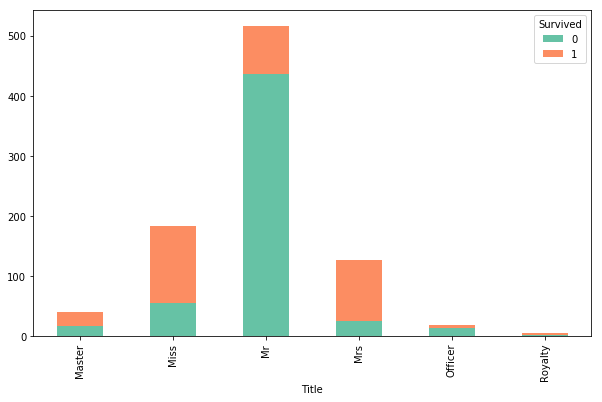

In [443]:
table1.plot(kind='bar',stacked=True,figsize=(10,6))

So, children and women had better chances of survival than other passengers

## Sex

No changes needed for this column

## SibSp and Parch

Let's create a new feature called family that will have the family size of each passenger

In [444]:
df_train['Family'] = df_train['Parch'] + df_train['SibSp']
df_test['Family'] = df_test['Parch'] + df_test['SibSp']

In [445]:
df_train.groupby(['Family'])['Survived'].value_counts()
#this says group by family, the values of the "Survived" column

Family  Survived
0       0           374
        1           163
1       1            89
        0            72
2       1            59
        0            43
3       1            21
        0             8
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
Name: Survived, dtype: int64

This coloumn is almost done, but we can give intuitive names to each family size and may be further decrease the number of classes

In [446]:
def fSize(x):
    """Mapping from numerical sizes to categorical ones"""
    if x == 1 or x == 2:
        return 'small'
    elif x == 3:
        return 'medium'
    elif x >= 5:
        return 'big'
    else:
        return 'single'
    
df_train['Family'] = df_train["Family"].apply(lambda x : fSize(x))
df_test['Family'] = df_test["Family"].apply(lambda x : fSize(x))

In [447]:
df_train.groupby(['Pclass', 'Family'])['Survived'].value_counts()

Pclass  Family  Survived
1       big     0             2
                1             2
        medium  1             5
                0             2
        single  1            60
                0            51
        small   1            69
                0            25
2       big     1             1
        medium  1            10
                0             3
        single  0            68
                1            37
        small   1            39
                0            26
3       big     0            38
                1             4
        medium  1             6
                0             3
        single  0           267
                1            69
        small   0            64
                1            40
Name: Survived, dtype: int64

## Ticket

Don't see how this can be useful. Almost all the values are unique and all the information they convey can be gotten from pclass

## Fare

There is a single missing value in test set. Lets fill it with the median value of it's class

In [448]:
df_test.loc[df_test['Fare'].isnull(),'Fare'] = df_test.groupby(['Pclass'])['Fare'].median()[3]

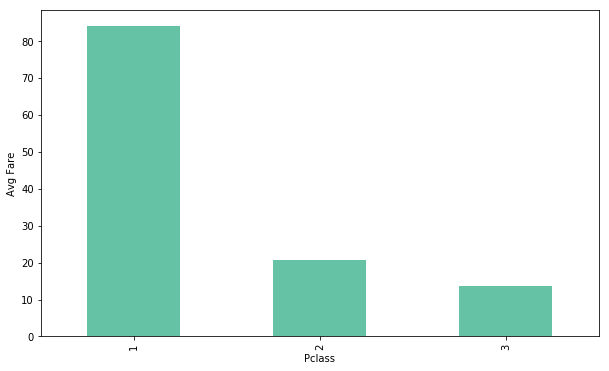

In [449]:
df_train.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(10,6)).set_ylabel("Avg Fare")

## Cabin

This column has a lots of missing value. Ignoring this column may seem tempting but as it turns out, passengers with no cabin info were more likely to die. See below.

In [450]:
#filling na with 'Unknown"
df_train.Cabin.fillna('Unknown',inplace=True)
df_test.Cabin.fillna('Unknown',inplace=True)

In [451]:
#replacing cabin numbers with first letters
df_train['Cabin'] = df_train['Cabin'].map(lambda x: x[0])
df_test['Cabin'] = df_test['Cabin'].map(lambda x: x[0])

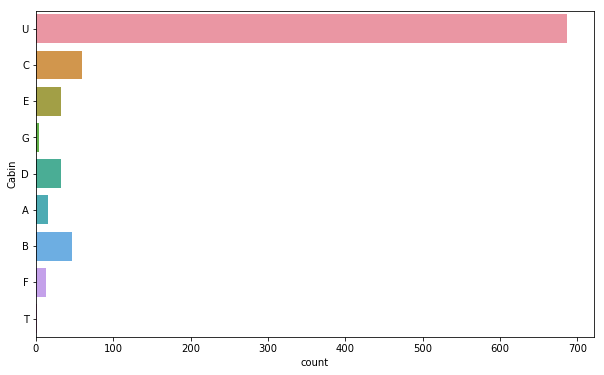

In [452]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(y='Cabin', data=df_train)

In [453]:
df_train.groupby(['Cabin'])['Survived'].value_counts()

Cabin  Survived
A      0             8
       1             7
B      1            35
       0            12
C      1            35
       0            24
D      1            25
       0             8
E      1            24
       0             8
F      1             8
       0             5
G      0             2
       1             2
T      0             1
U      0           481
       1           206
Name: Survived, dtype: int64

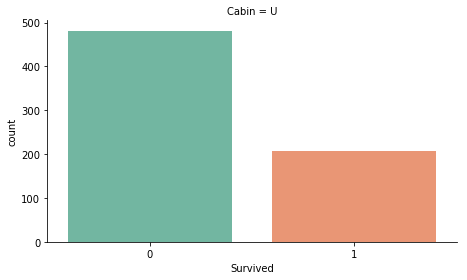

In [454]:
ax = sns.factorplot(x='Survived', col_wrap=4,kind="count",col='Cabin',size=4, aspect=1.5,data = df_train[df_train.Cabin == 'U'])

The majority of the passengers who had no info about their Cabin did not survive.
For passengers with cabin info, the survivability rates vary.

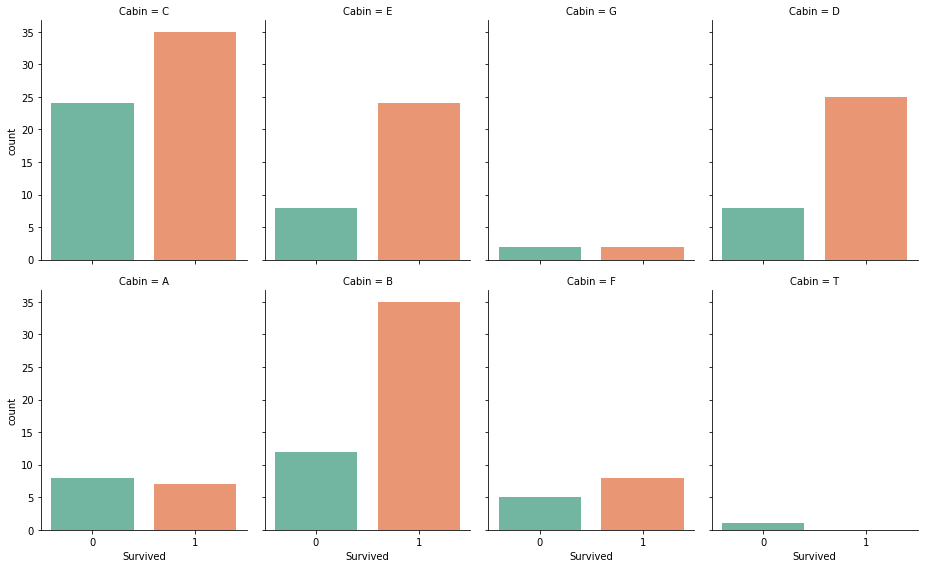

In [455]:
sns.factorplot('Survived', col='Cabin', col_wrap=4, data=df_train[df_train.Cabin != 'U'], kind='count', size=4, aspect=.8)

## Embarked

For this column I will just fill the missinig values with Mode

In [456]:
modeEmbarked = df_train.groupby(['Embarked'])['PassengerId'].count()
modeEmbarked['S']

644

In [457]:
df_train['Embarked'].fillna(modeEmbarked['S'], inplace=True)

## Age

I missed this column before. But better late than never. Turns out simply replacing with mean/median/mode isn't good enough. So I will fill them up by median of their respective sex,Pclass and title

In [458]:
df_train.groupby(['Sex','Pclass','Title'])['Age'].median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [459]:
df_train['Age'] = df_train.groupby(['Sex','Pclass','Title'])['Age'].apply(lambda x:x.fillna(x.median()))
df_test['Age'] = df_test.groupby(['Sex','Pclass','Title'])['Age'].apply(lambda x:x.fillna(x.median()))

# Data Preparation

In [460]:
#How it looks now
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,single


In [461]:
#drop unnecesary columns
df_train.drop(['Ticket', 'Name', 'SibSp', 'Parch'],axis=1,inplace=True)
df_test.drop(['Ticket', 'Name', 'SibSp', 'Parch'],axis=1,inplace=True)